# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# read the data
df = pd.read_csv('C:/Users/veren/OneDrive/Documenten/MIT/Foundations of Data Science/Statistics for Data Science/assessment/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:


The dataset contains 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The dataset contains 4 variables with datatype integer, these are the  columns order_id, customer_id, food_preparation_time and delivery_time.  Furhtermore, it contains four columns with datatype object, these are restaurant_name, cuisine_name, day_of_the_week and rating. In addition, the dataset contains one column with datatype float and that is the column: cost_of_the_order.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# checking for missing data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [10]:
# checking if there are categories indicating an invalid category
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [11]:
# checking if there are categories indicating an invalid category
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

#### Observations:


First, I look for missing values using the isnull statement. This does not give me any missing values. 
For the variables day_of_the_week and rating which contain strings, I do a second check, looking at value counts and I see that rating has a category not given. 
Strictly speaking this is also  a missing value as customers did not provide a rating. However, it might be good to still use it 
as a separate category at it is a quite huge group and if we would impute a value, this would affect our interpretation of the data.
Day_of_the_week does not contain any missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


The minimum time for food preparation once an order is place is 20 minutes, the average time is approximately 27 minutes and the maximum amount of time for food preparation is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

**Order ID**

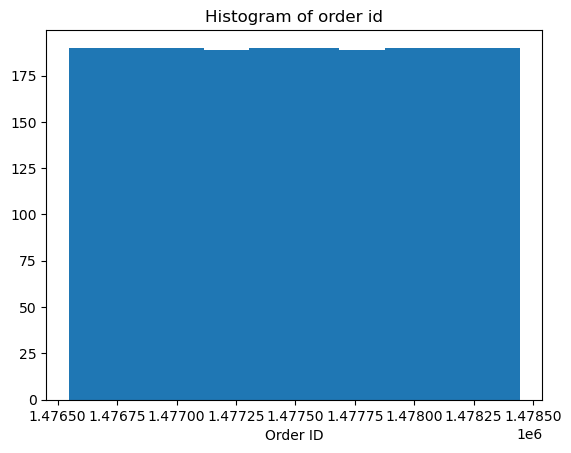

In [14]:
#histogram of order id with labels.
plt.hist(df['order_id'])
plt.title('Histogram of order id')
plt.xlabel('Order ID')
plt.show()

The distribution of order Id is uniform, this is logical as order IDs should be unique within the dataset. Thus, it indicates
that the dataset is unique on order ID.

**Customer ID**

In [15]:
df['customer_id'].nunique()

1200

There are 1200 unique customers in the dataset

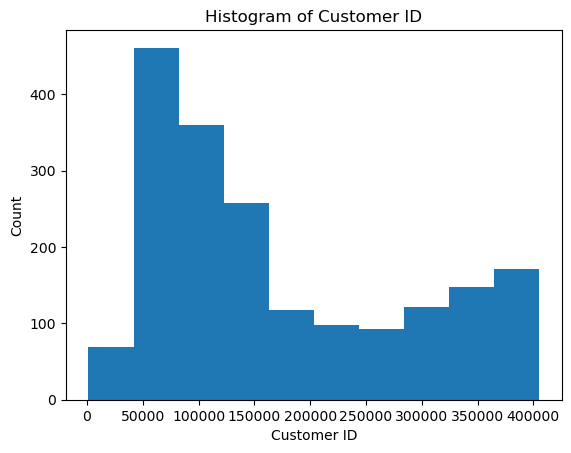

In [16]:
#histogram of customer id with labels.
plt.hist(df['customer_id'])
plt.title('Histogram of Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

Most customer ids within the dataset have a number between 50000 and 100000. Looking at the distribution
of the ID does not give much insight as it does not say much about if the count is high because many customer ids start fall 
into this range or if it is high because a customer ordered multiple times. It might be more insightful to look at the number
of orders placed by the same customer:

In [17]:
#customers with most orders:
df['customer_id'].value_counts().head(15)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
Name: customer_id, dtype: int64

In [18]:
# average amount of orders placed by a customer
df['customer_id'].value_counts().mean()

1.5816666666666668

The average customer placed 1.58 orders. The customer with most placed orders placed 13, followed by one customer with 10, one with 9 and one with 8 orders. 

**Customer Rating**

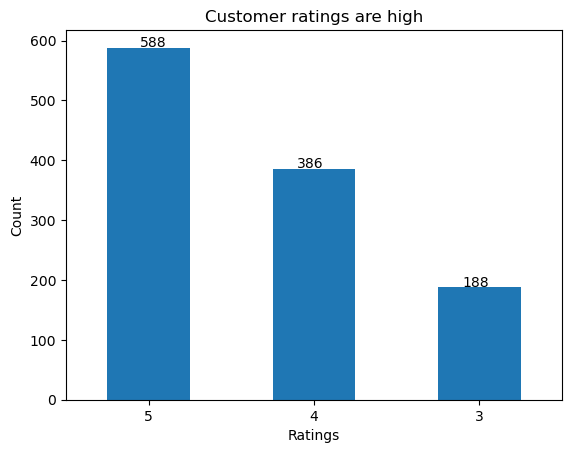

In [19]:
#removing the category 'Not given':
d=df[df['rating']!='Not given']
# bar plot of customer rating with labels and counts 
d['rating'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer ratings are high')
plt.text(x = -0.05, y = d.rating.value_counts()[0]+1, s = d.rating.value_counts()[0])
plt.text(x = 0.90, y = d.rating.value_counts()[1]+1, s = d.rating.value_counts()[1])
plt.text(x = 1.90, y = d.rating.value_counts()[2]+1, s = d.rating.value_counts()[2])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Overall are most customers satisfied, 588 customers  gave a rating of 5, 386 customers gave a 4. No customer rated the site 1 or 2, the lowest rating given was 3 by 188 customers. 736 customers did not give a rating.

**Restaurant Name**

In [20]:
d=df['restaurant_name'].nunique()
print('There are %1.0f restaurant names in the dataset.' %d)

There are 178 restaurant names in the dataset.


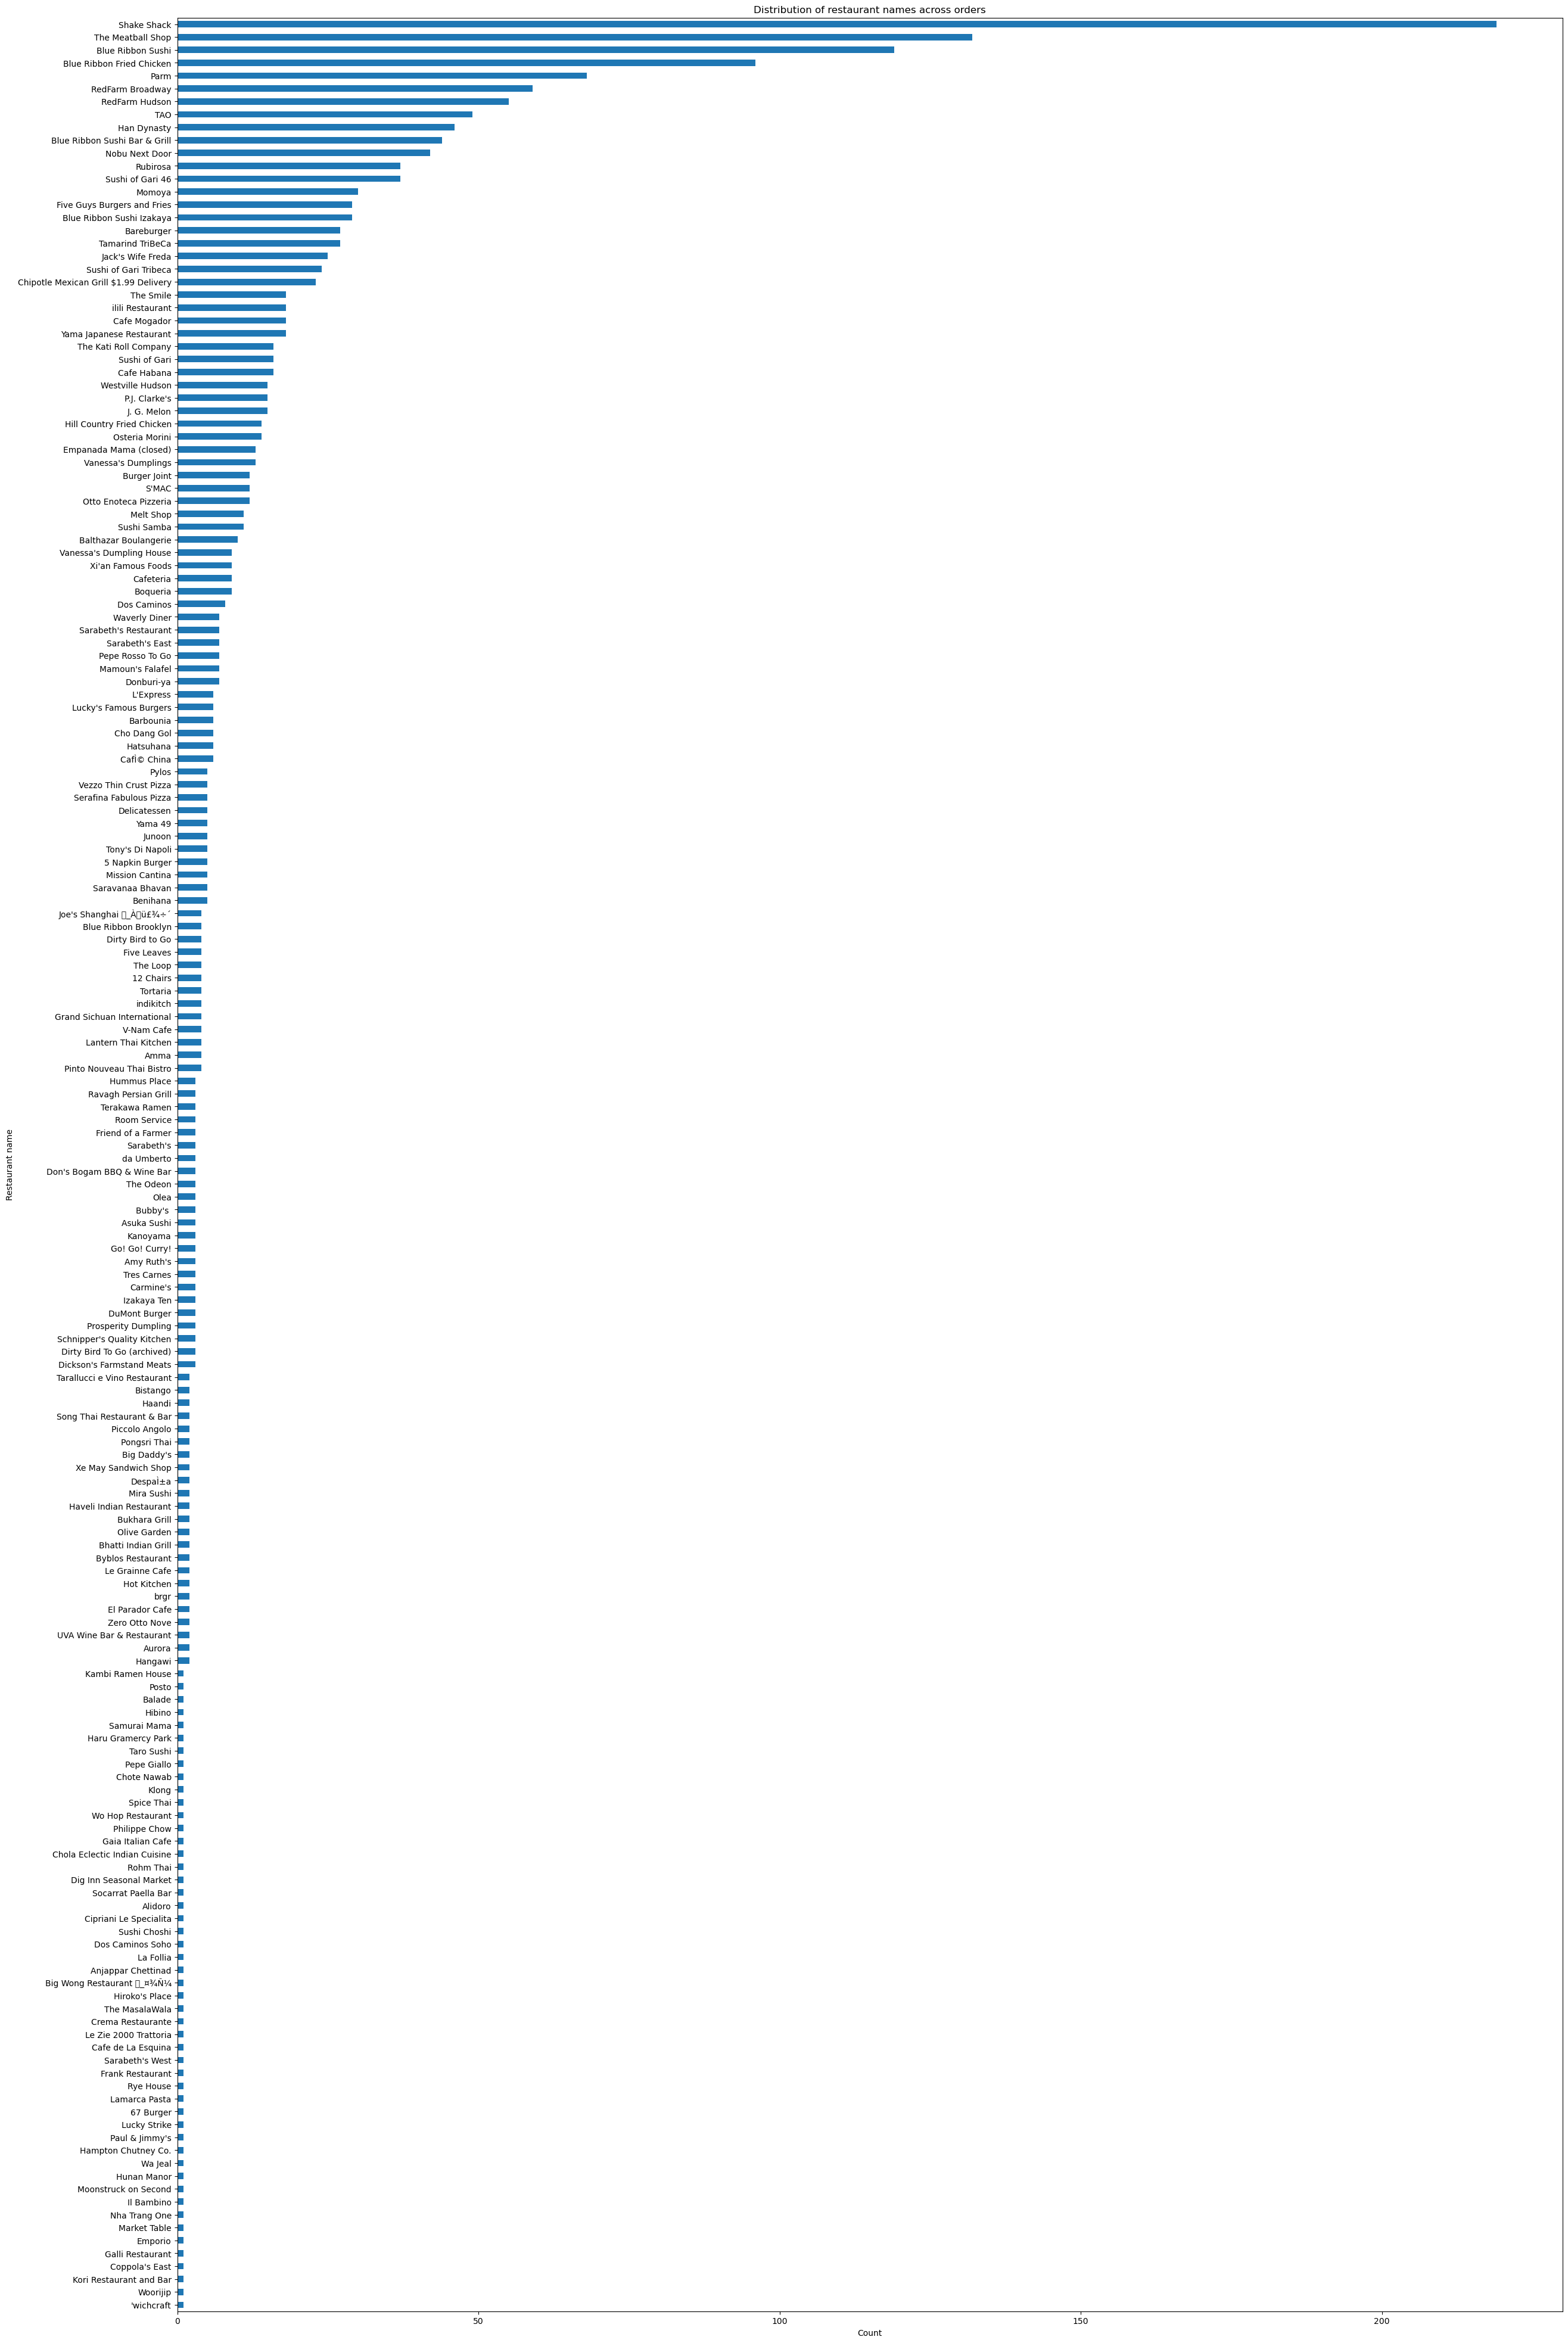

In [21]:
#bar plot of restaurant names with labels and adjusted size of the figure
plt.figure(figsize = (30,50))
df.restaurant_name.value_counts().sort_values(ascending=True).plot(kind='barh', rot = 0)
plt.title('Distribution of restaurant names across orders')
plt.xlabel('Count')
plt.ylabel('Restaurant name')
plt.show()


Most restaurants  receive only a few orders while a small group of restaurants receives the bulk  of all orders.( I assume that restaurant names are unique and not used by multiple restaurants, this is not clear from the dataset as there is no restaurant id).

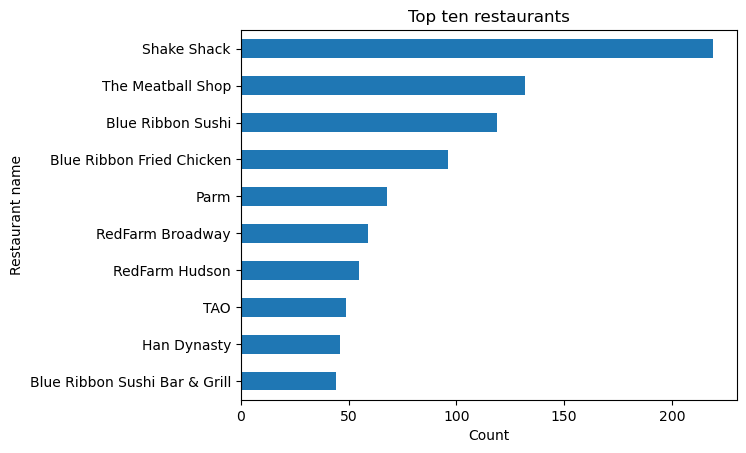

In [22]:
# bar plot with selection of the ten restaurants with highest counts 
df.restaurant_name.value_counts()[:10].sort_values(ascending=True).plot(kind='barh', rot = 0)
plt.title('Top ten restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant name')
plt.show()

The top ten restaurants received between a bit less than 50 orders and more than 200. Shake Shack received most orders (above 200)
followed by The Meatball, Show, Blue Ribbon Sushi and Blue Ribbon Fried Chicken whose orders count ranges between below 100 and
150 orders. The other six restaurants received less than 100 orders each.

**Cuisine type**

Text(0, 0.5, 'Count')

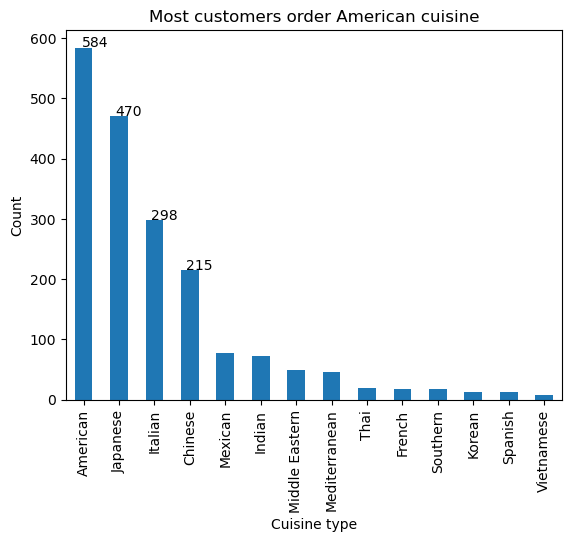

In [23]:
#bar plot of cuisine tpe with title, labels and indication of the counts for the top categories
df['cuisine_type'].value_counts().plot(kind='bar')
plt.title('Most customers order American cuisine')
plt.text(x = -0.05, y = df.cuisine_type.value_counts()[0]+1, s = df.cuisine_type.value_counts()[0])
plt.text(x = 0.90, y = df.cuisine_type.value_counts()[1]+1, s = df.cuisine_type.value_counts()[1])
plt.text(x = 1.90, y = df.cuisine_type.value_counts()[2]+1, s = df.cuisine_type.value_counts()[2])
plt.text(x = 2.90, y = df.cuisine_type.value_counts()[3]+1, s = df.cuisine_type.value_counts()[3])
plt.xlabel('Cuisine type')
plt.ylabel('Count')

If cuisine type is considered most customer order American cuisine, almost 584 times, followed by Japanese (470 orders, Italian (298 orders) and Chinese (215 order).Other cuisine types received less than 100 orders. To this group belong in descending order: Mexican, Indian, Middle Eastern,Mediterranean, Thai, French, Southern, Korean, Spanish and Vietnamese cuisine. 

**Cost of the order**

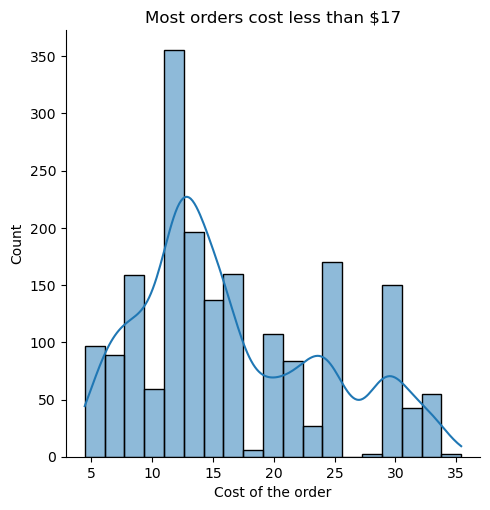

In [24]:
# displot of the distribution of costs of the order with labels
sns.displot(df['cost_of_the_order'], kde=True)
plt.title('Most orders cost less than $17')
plt.ylabel('Count')
plt.xlabel('Cost of the order')
plt.show()

The costs of the orders varies between approximately 100 orders of \\$5 en less than 20 orders of approximately \\$35. Order costs piek at around \\$11.5 with approximately 350 orders. While number of orders generally decreases with higher order costs, there are two smaller pieks at \\$25 and \\$30.  

**Delivery Time**

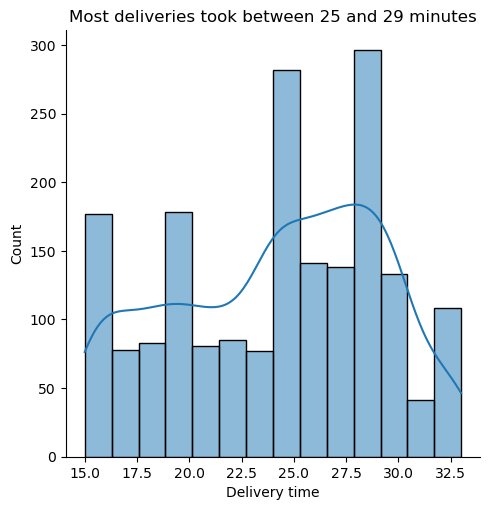

In [25]:
# displot of the distribution of delivery time  with labels
sns.displot(df['delivery_time'], kde=True)
plt.title('Most deliveries took between 25 and 29 minutes')
plt.ylabel('Count')
plt.xlabel('Delivery time')
plt.show()

Out of 1898 order approximately 100 orders had a delivery time of 32.5 minutes. The majority of the orders was deliverd a  between 25 and 29 minutes and the quickest delivery took approximately 15 minutes (approximately 170 times).

**Day of the Week**

Text(0.5, 1.0, 'Almost three quarters of the orders were placed during the weekend.')

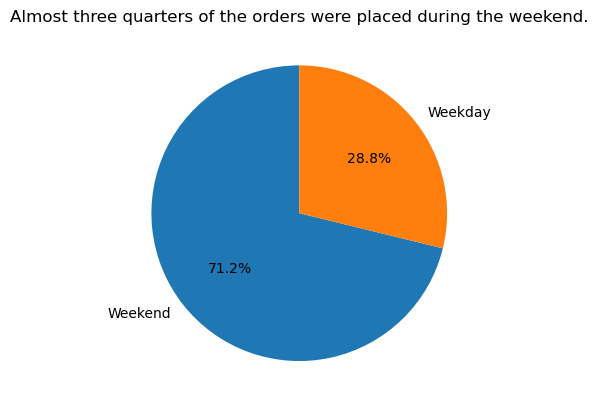

In [26]:
# pieplot of the value counts of day of the week 
plt.pie(df.day_of_the_week.value_counts(), autopct='%1.1f%%', startangle=90, radius=1, labels= [ 'Weekend', 'Weekday']) 
plt.title('Almost three quarters of the orders were placed during the weekend.', pad=5)

71.2% of all orders were place during the weekend compared to 28.8% being placed on a weekday

**Food Preparation Time**

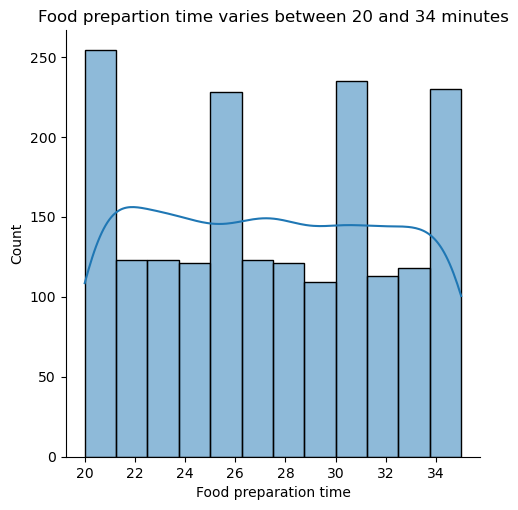

In [27]:
# displot of the distribution of food preparation time with labels
sns.displot(df['food_preparation_time'], kde=True)
plt.title('Food prepartion time varies between 20 and 34 minutes')
plt.ylabel('Count')
plt.xlabel('Food preparation time')
plt.show()

The distribution of food preparation time varies widely, overall there are four peaks. 250 orders were prepared in 20 minutes,
approximately 220 in 26 minutes, approximately 230 in 30 minkutes and 225 in 34 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# selection of 5 restaurants with highest number of orders received
df['restaurant_name'].value_counts()[0:5]


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top 5 restaurants in terms of number of orders are Shake Shack with 219 orders, followed by The Meatball Shop (132 orders), 
Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders) and Parm (68 orders).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [29]:
# crosstable of cuisine type and day of the week
pd.crosstab(df['cuisine_type'], df['day_of_the_week'])

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


#### Observations:


American cuisine is the most popular cuisne on weekends with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [30]:
# calculating: number of orders with cost of the order more than 20 dollars divided by total costs of the order. Result rounded.
np.round(df['cost_of_the_order'][df['cost_of_the_order']>20].count()/df['cost_of_the_order'].count(),2)


0.29

#### Observations:


29% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# mean order delivery time, rounded
np.round(df['delivery_time'].mean(),0)


24.0

#### Observations:


The mean order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# value counts of 3 customer ids with highest counts
df['customer_id'].value_counts().iloc[0:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The three most frequent customers are 52832 with 13 orders, 47440 with 10 orders and 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


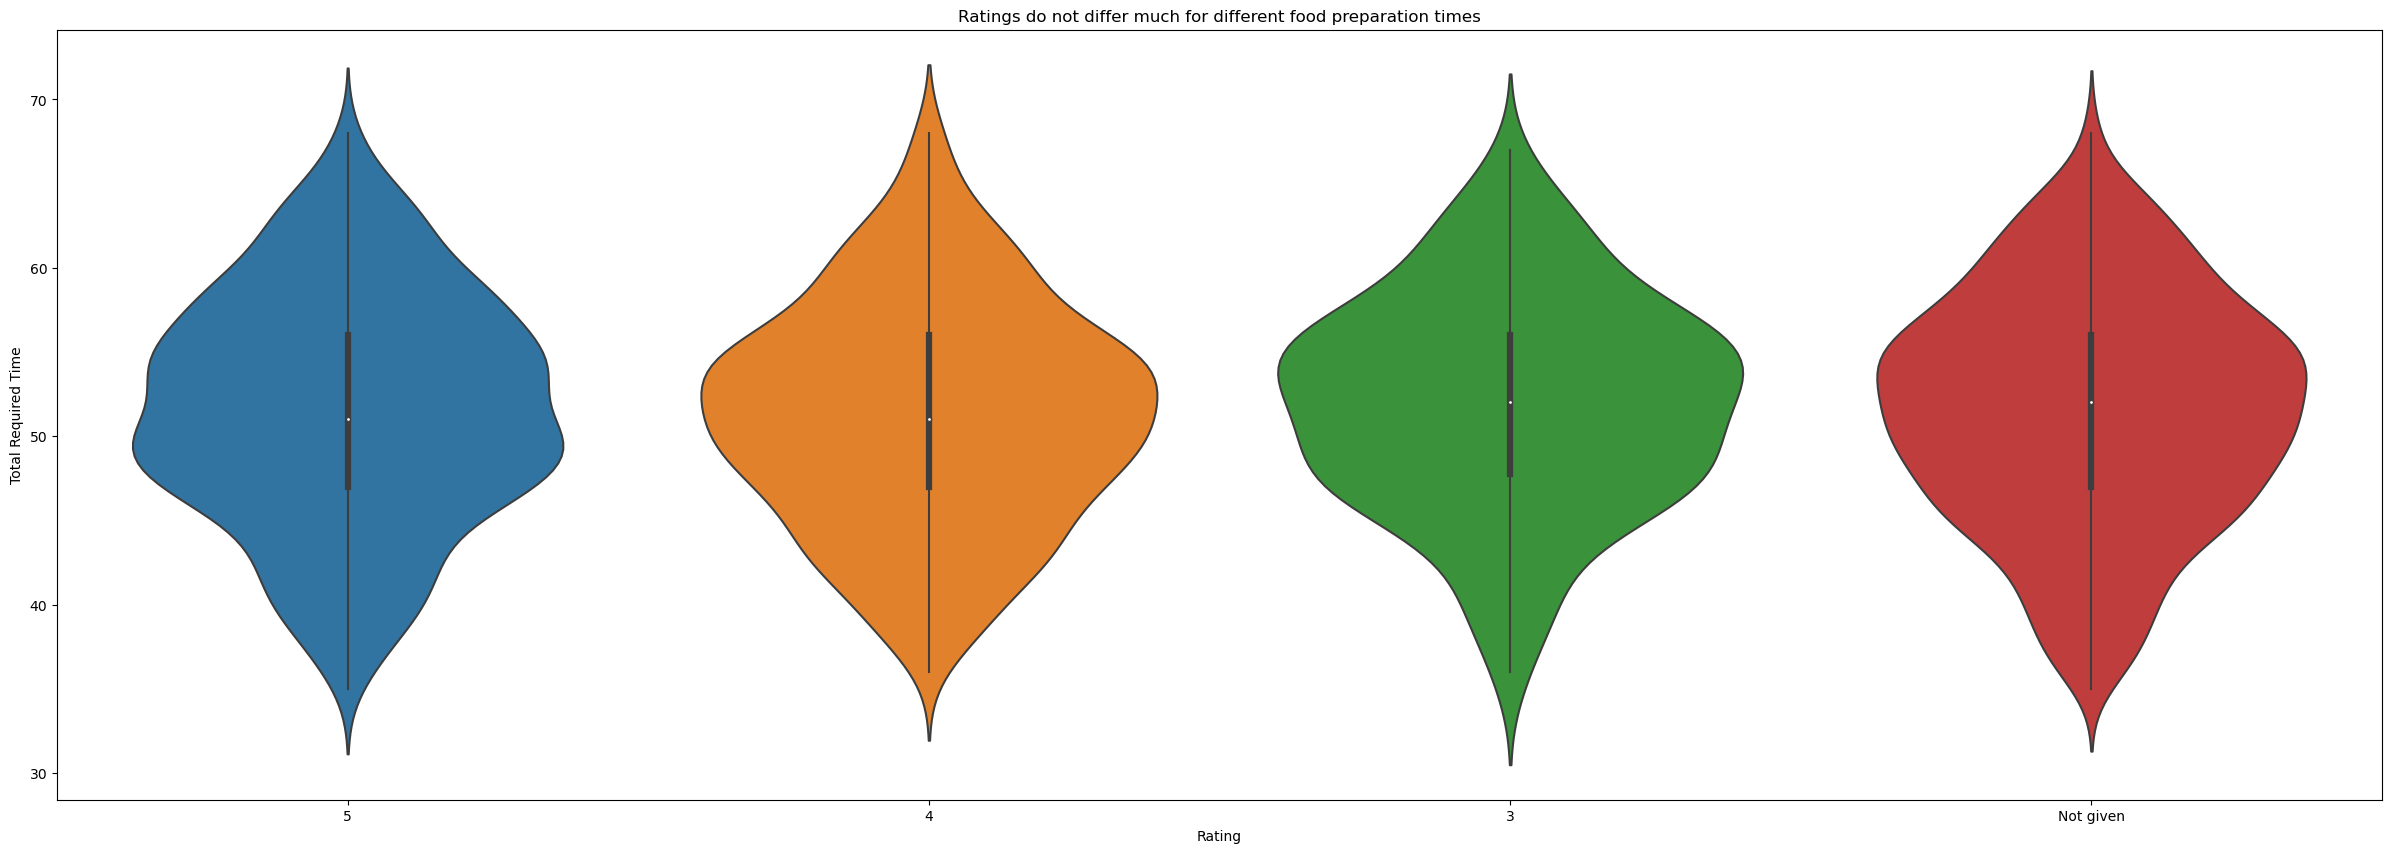

In [33]:
# calculating total required time
df['total_required_time']=df['delivery_time']+df['food_preparation_time']
# changing plot size
plt.figure(figsize=(30,10))
# violin plot of the distribution of total required time by rating, given the order of the categories of rating
sns.violinplot(y = 'total_required_time', x = 'rating', data = df, order=['5', '4', '3', 'Not given'])
# adding title and labels
plt.title('Ratings do not differ much for different food preparation times')
plt.ylabel('Total Required Time')
plt.xlabel('Rating')
plt.show()

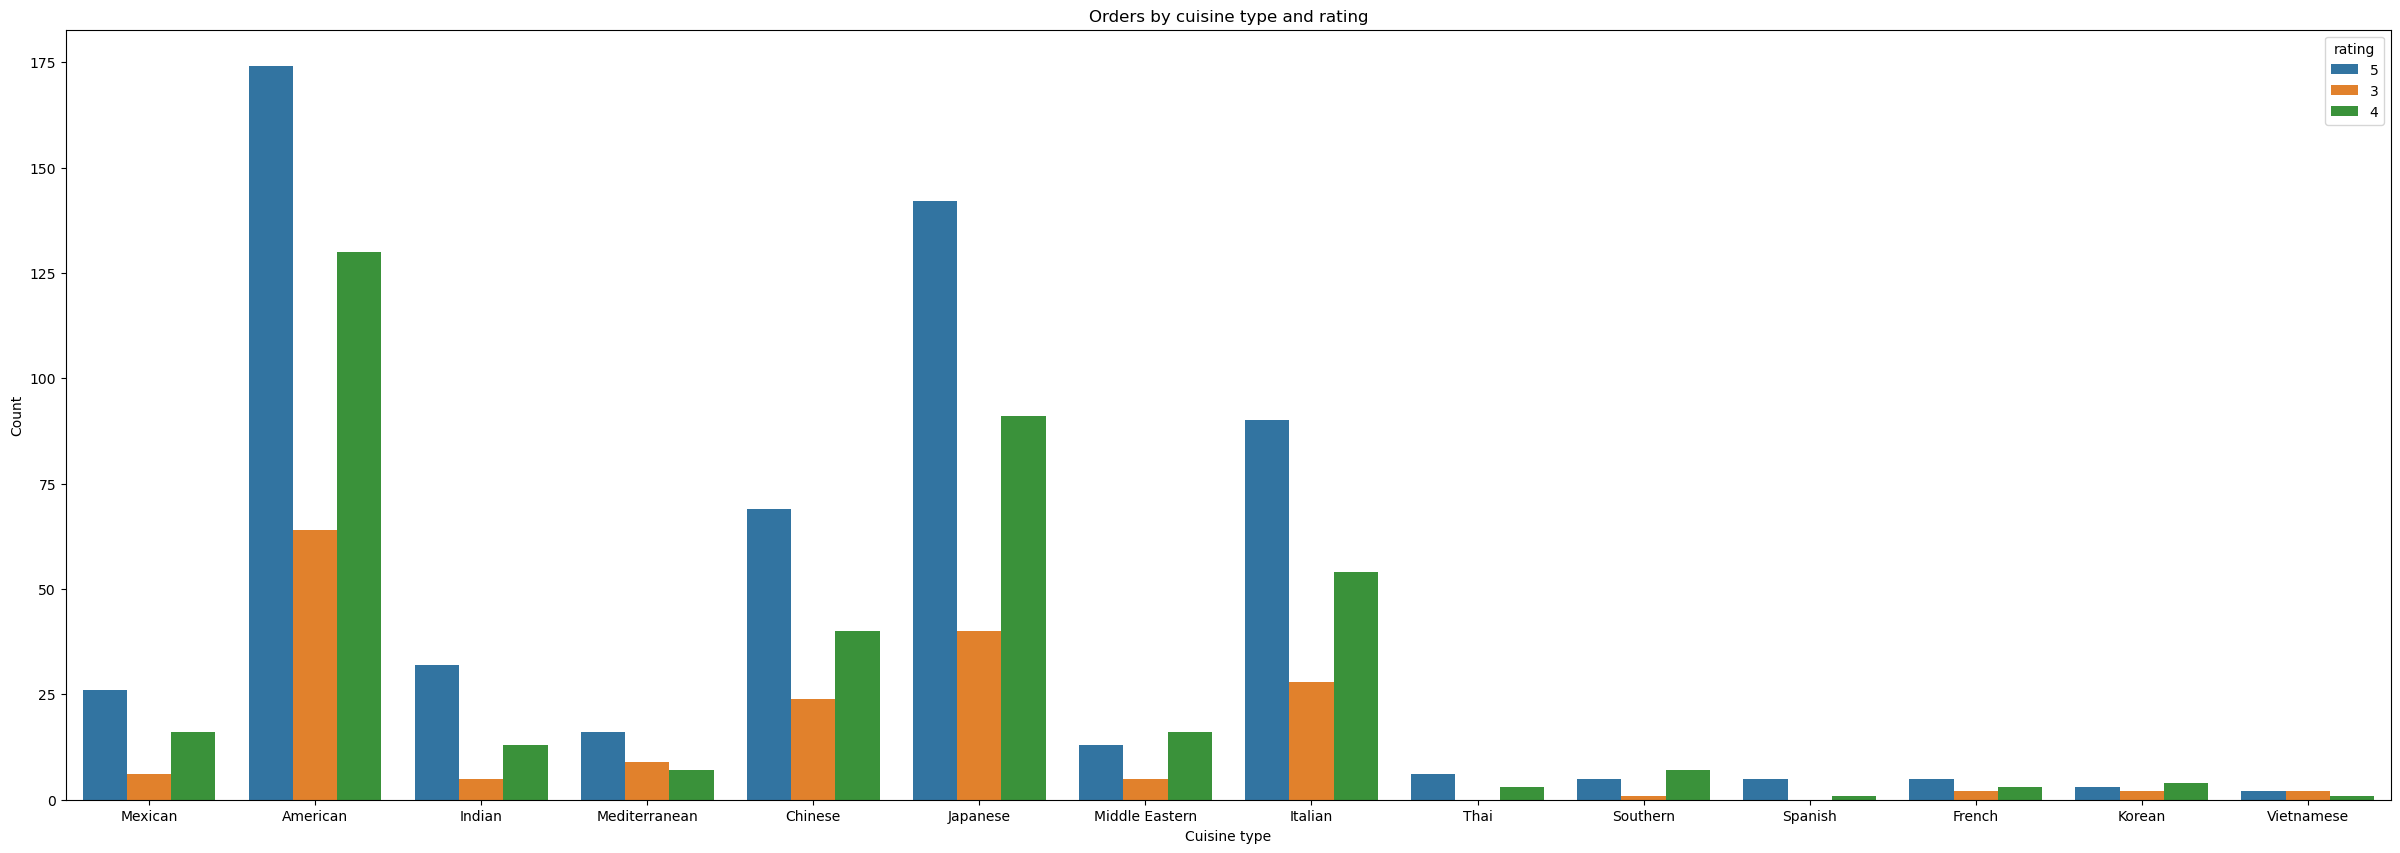

In [34]:
# removing rating not given
df1=df[df['rating']!='Not given']
#adapting size of the plot
plt.figure(figsize=(30,10))
# countplot of cuisine type and rating
sns.countplot(data = df1, x = 'cuisine_type', hue = 'rating')
# adding tile and labels
plt.title('Orders by cuisine type and rating')
plt.xlabel('Cuisine type')
plt.ylabel('Count')
plt.show()

Customers are in general positief with ratings ranging between 3 and 5 and for most cuisines most ratings are a five with the exception of Middle Eastern, Southern
and Korean. The more popular cuisines such as American, Japanese, Italian and Chinese exhibit a high customer satisfaction, most
ratings are five followed by a four, howver they all have a group of customers that only gives a rating of 3. Thus, there is 
some variation concering quality of service within cuisine type.



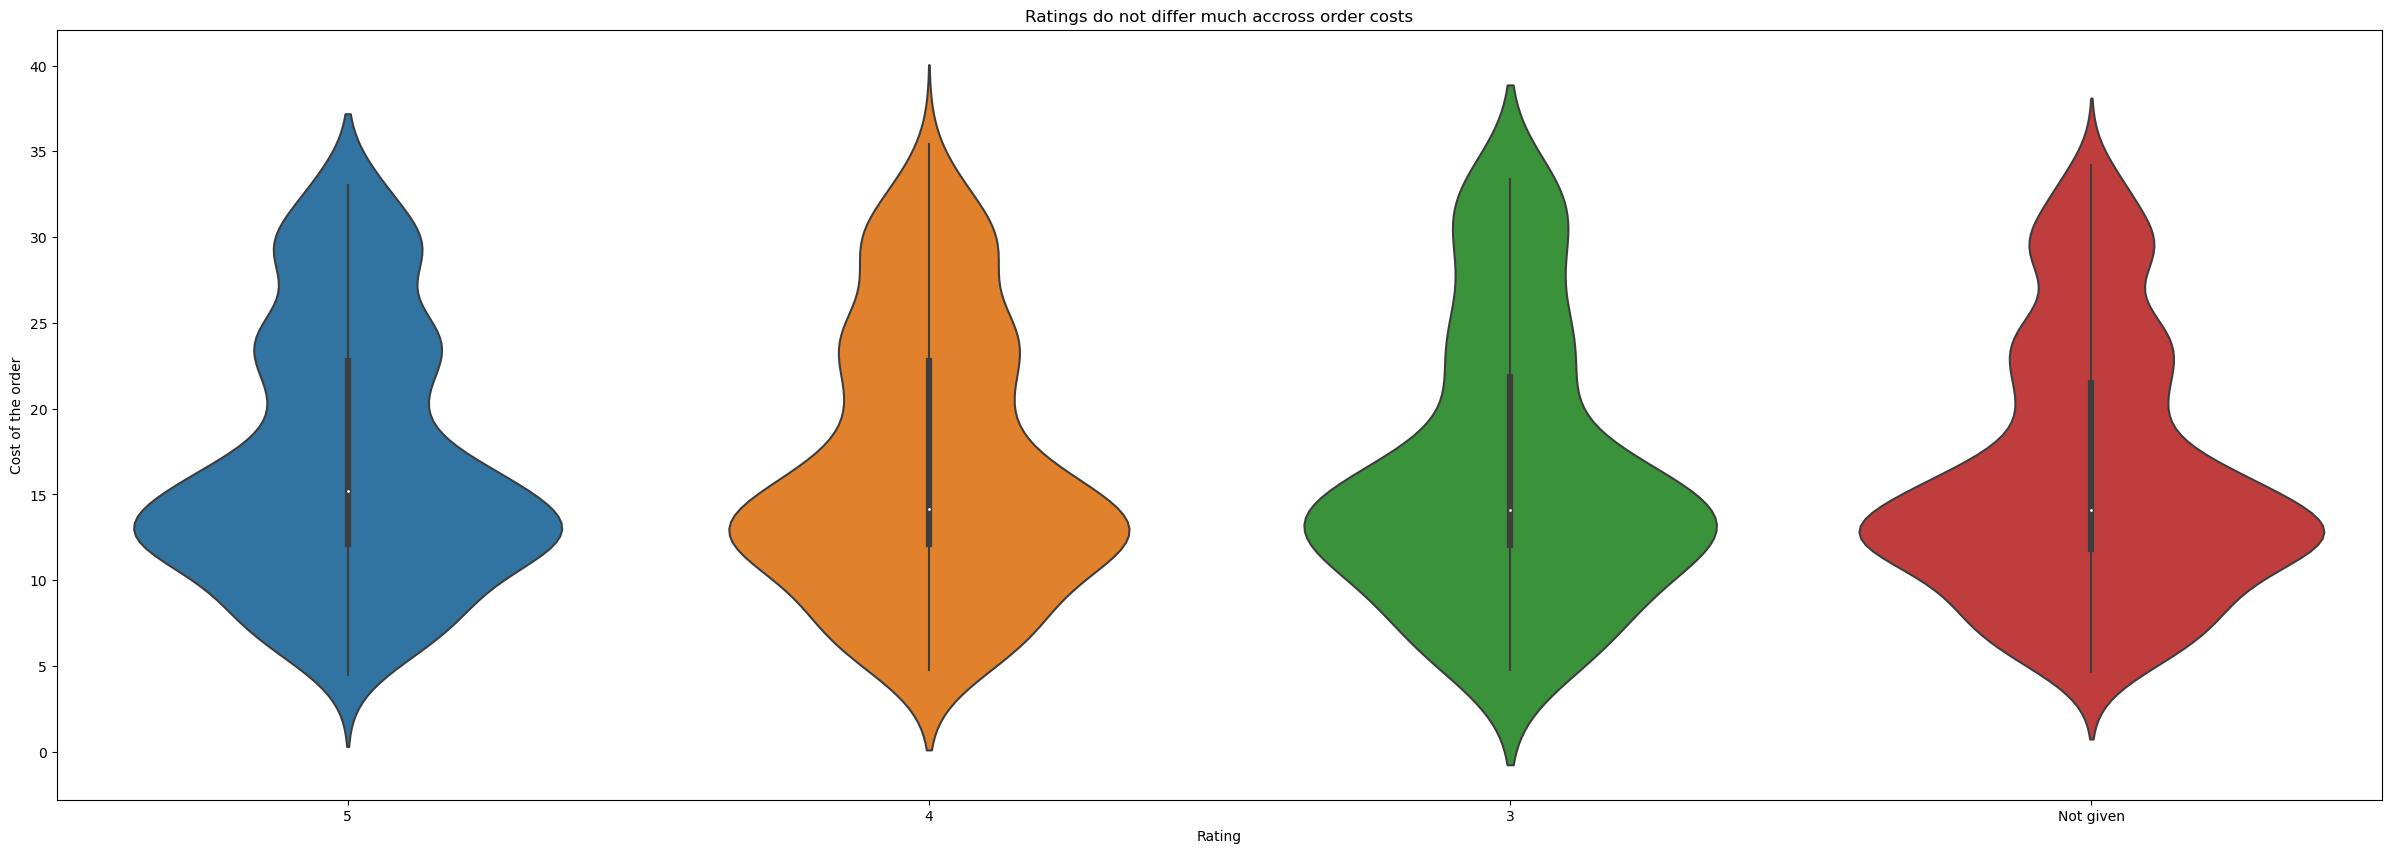

In [35]:
# adapting size of the figure
plt.figure(figsize=(30,10))
# violinplot of cost of the order and rating, with a specified order of the rating categories
sns.violinplot(y = 'cost_of_the_order', x = 'rating', data = df, order=['5', '4', '3', 'Not given'])
# adding title and labels
plt.title('Ratings do not differ much accross order costs')
plt.ylabel('Cost of the order')
plt.xlabel('Rating')
plt.show()

Ratings do not differ much across order costs. 

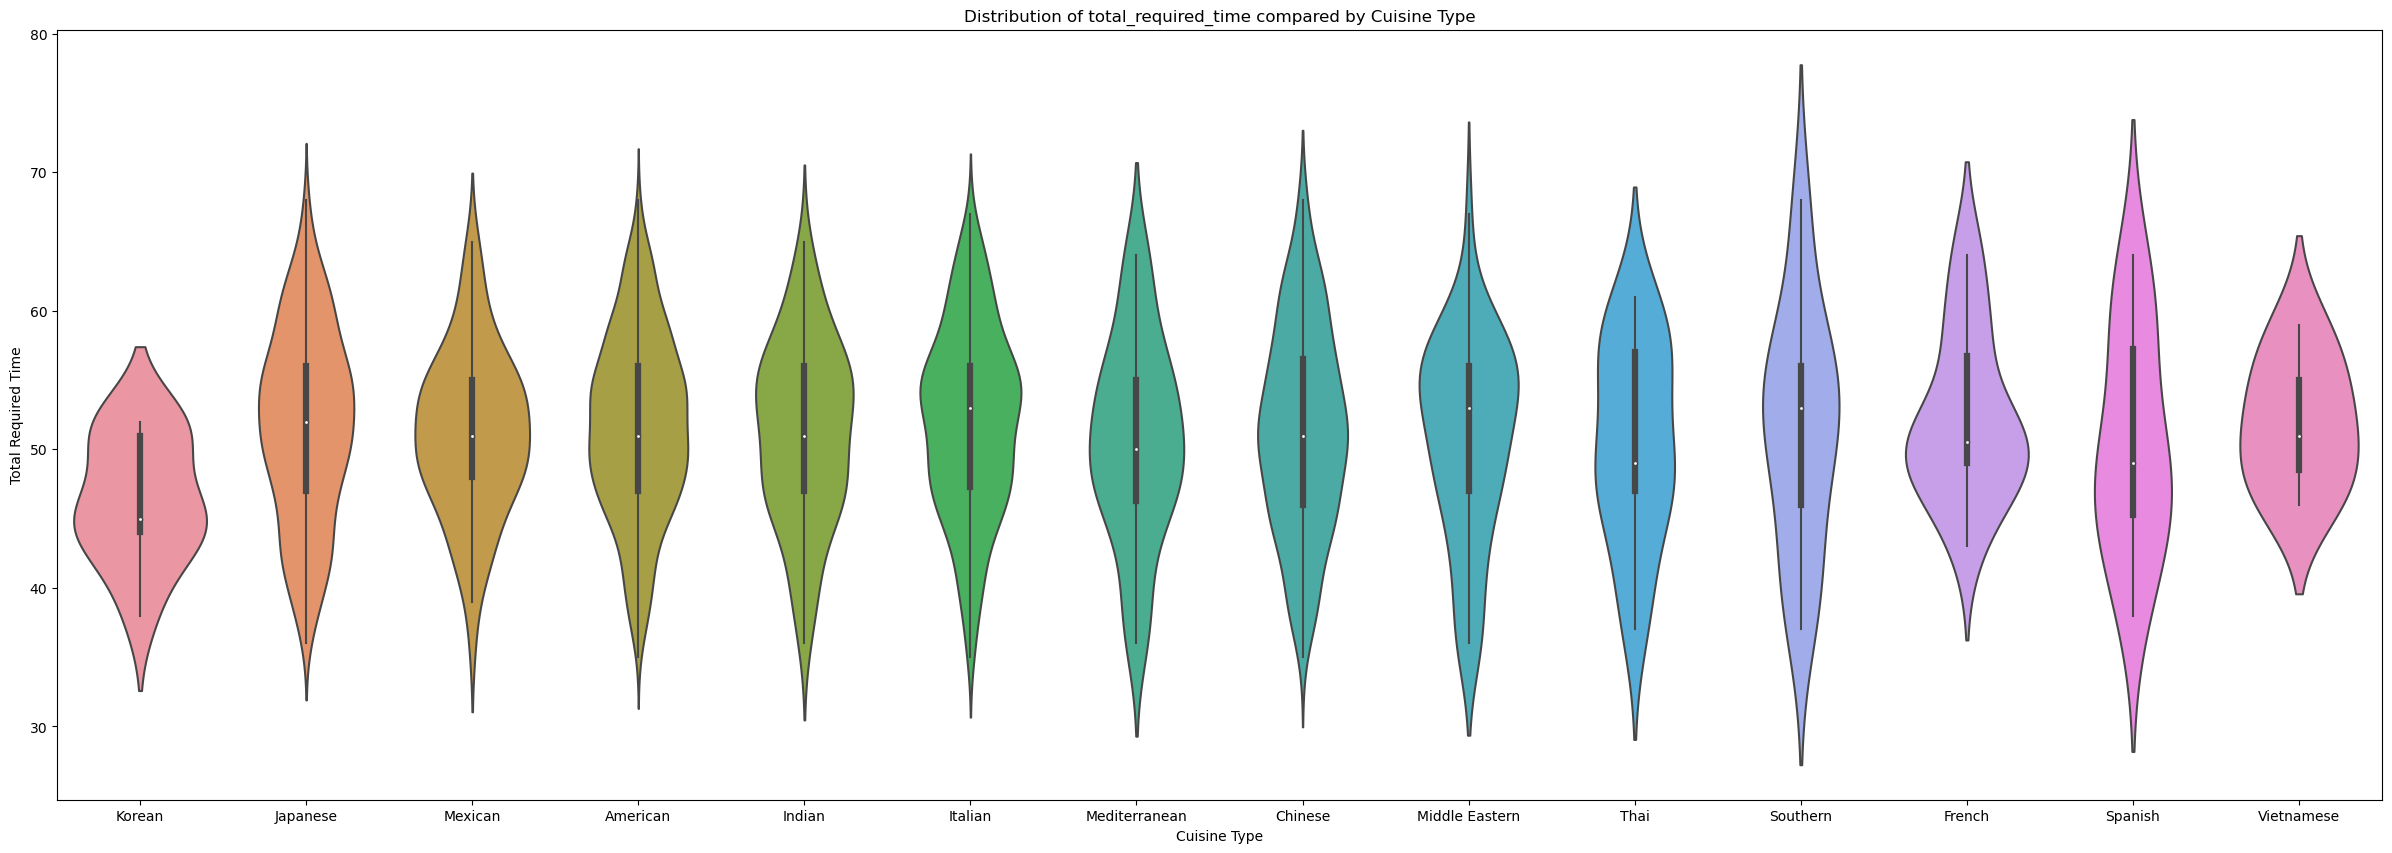

In [36]:
# calculating total required time
df['total_required_time']=df['delivery_time']+df['food_preparation_time']
# changing the size of the figure
plt.figure(figsize=(30,10))
# violin plot of total required time and cuisine type
sns.violinplot(y = 'total_required_time', x = 'cuisine_type', data = df)
# adding title and labels
plt.title('Distribution of total_required_time compared by Cuisine Type')
plt.ylabel('Total Required Time')
plt.xlabel('Cuisine Type')
plt.show()

We see that if total required time is considered that Vietnames cuisine and French take in general longer while the total required time for  Korean 
cuisine is shorter. For Southern and Spanish cuisine the variation across restaurants is higher than for other cuisines.

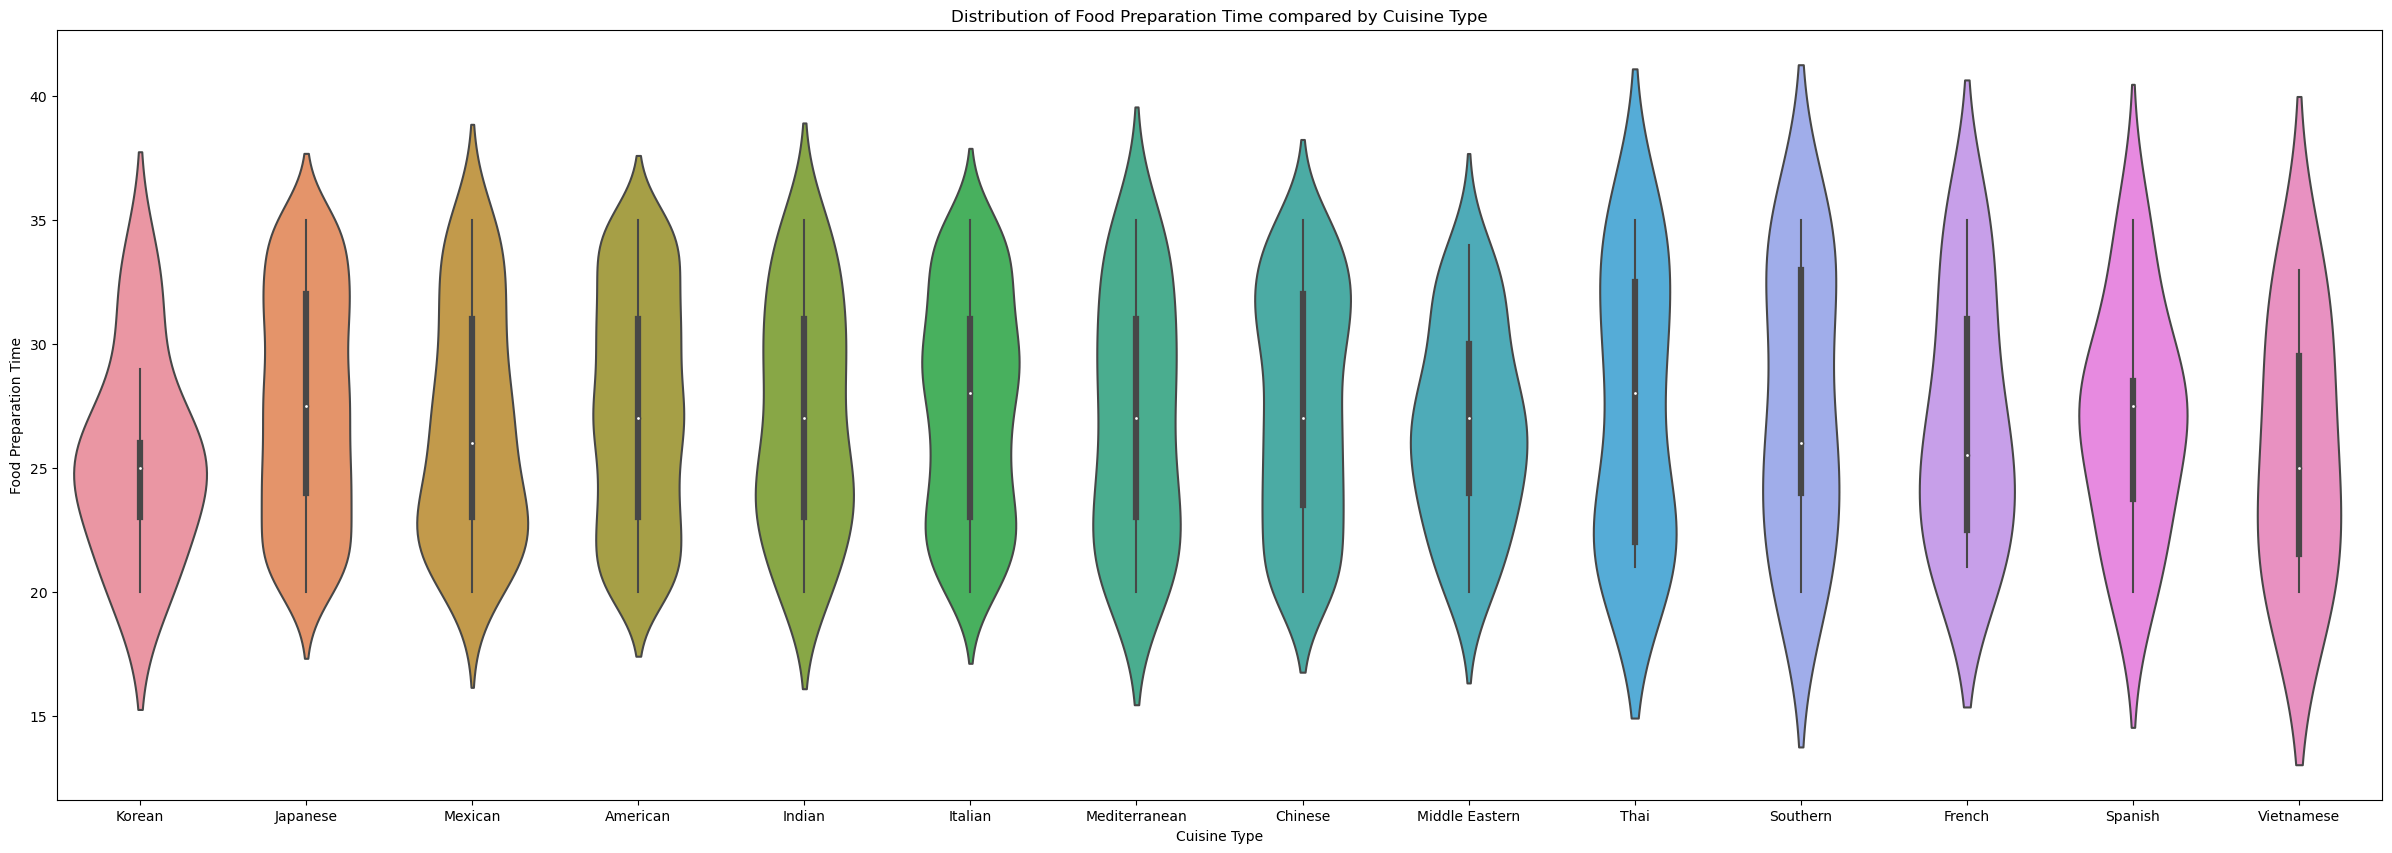

In [37]:
#adjusting figure size
plt.figure(figsize=(30,10))
#violin plot of food preparation time and cuisine type
sns.violinplot(y = 'food_preparation_time', x = 'cuisine_type', data = df)
# adding title and labels
plt.title('Distribution of Food Preparation Time compared by Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.show()

Food preparation time varies the most across restaurants for Vietnamese, Southern cuisine and Thai restaurants. While this is much less the case for Korean restaurants.

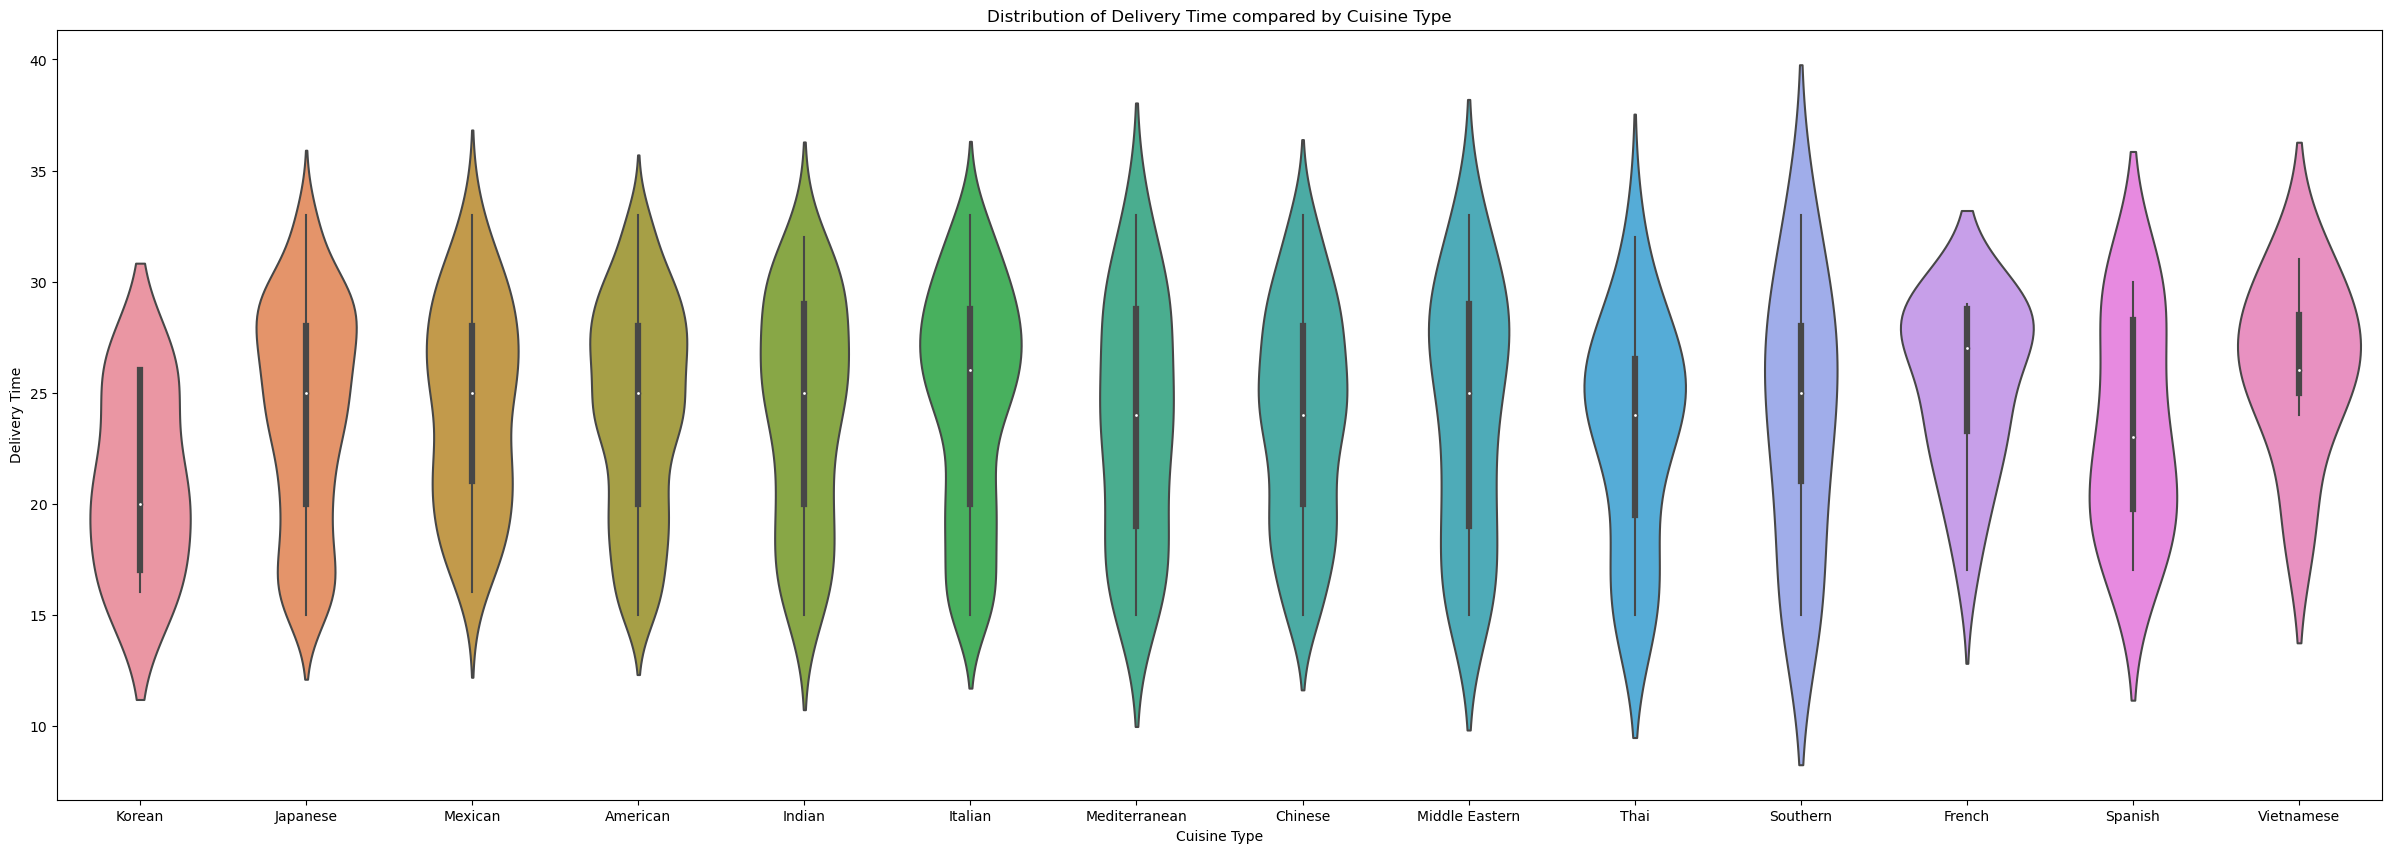

In [38]:
# calculating total required time
df['total_required_time']=df['delivery_time']+df['food_preparation_time']
# adjusting figure size
plt.figure(figsize=(30,10))
# violin plot of delivery time and cuisine type
sns.violinplot(y = 'delivery_time', x = 'cuisine_type', data = df)
# adding title and labels
plt.title('Distribution of Delivery Time compared by Cuisine Type')
plt.ylabel('Delivery Time')
plt.xlabel('Cuisine Type')
plt.show()

If we take a closer look at the role of delivery time we, see that while some Southern cusine restaurants have the longest delivery
times this is not a general trend for this cuisine while for French and Vientamese cuisine delivery moste restaurants have a delivery
time in the upper part of the distribution and few restaurants score well. The opposite is true for Korean cuisine where many 
restaurants score in the lower.

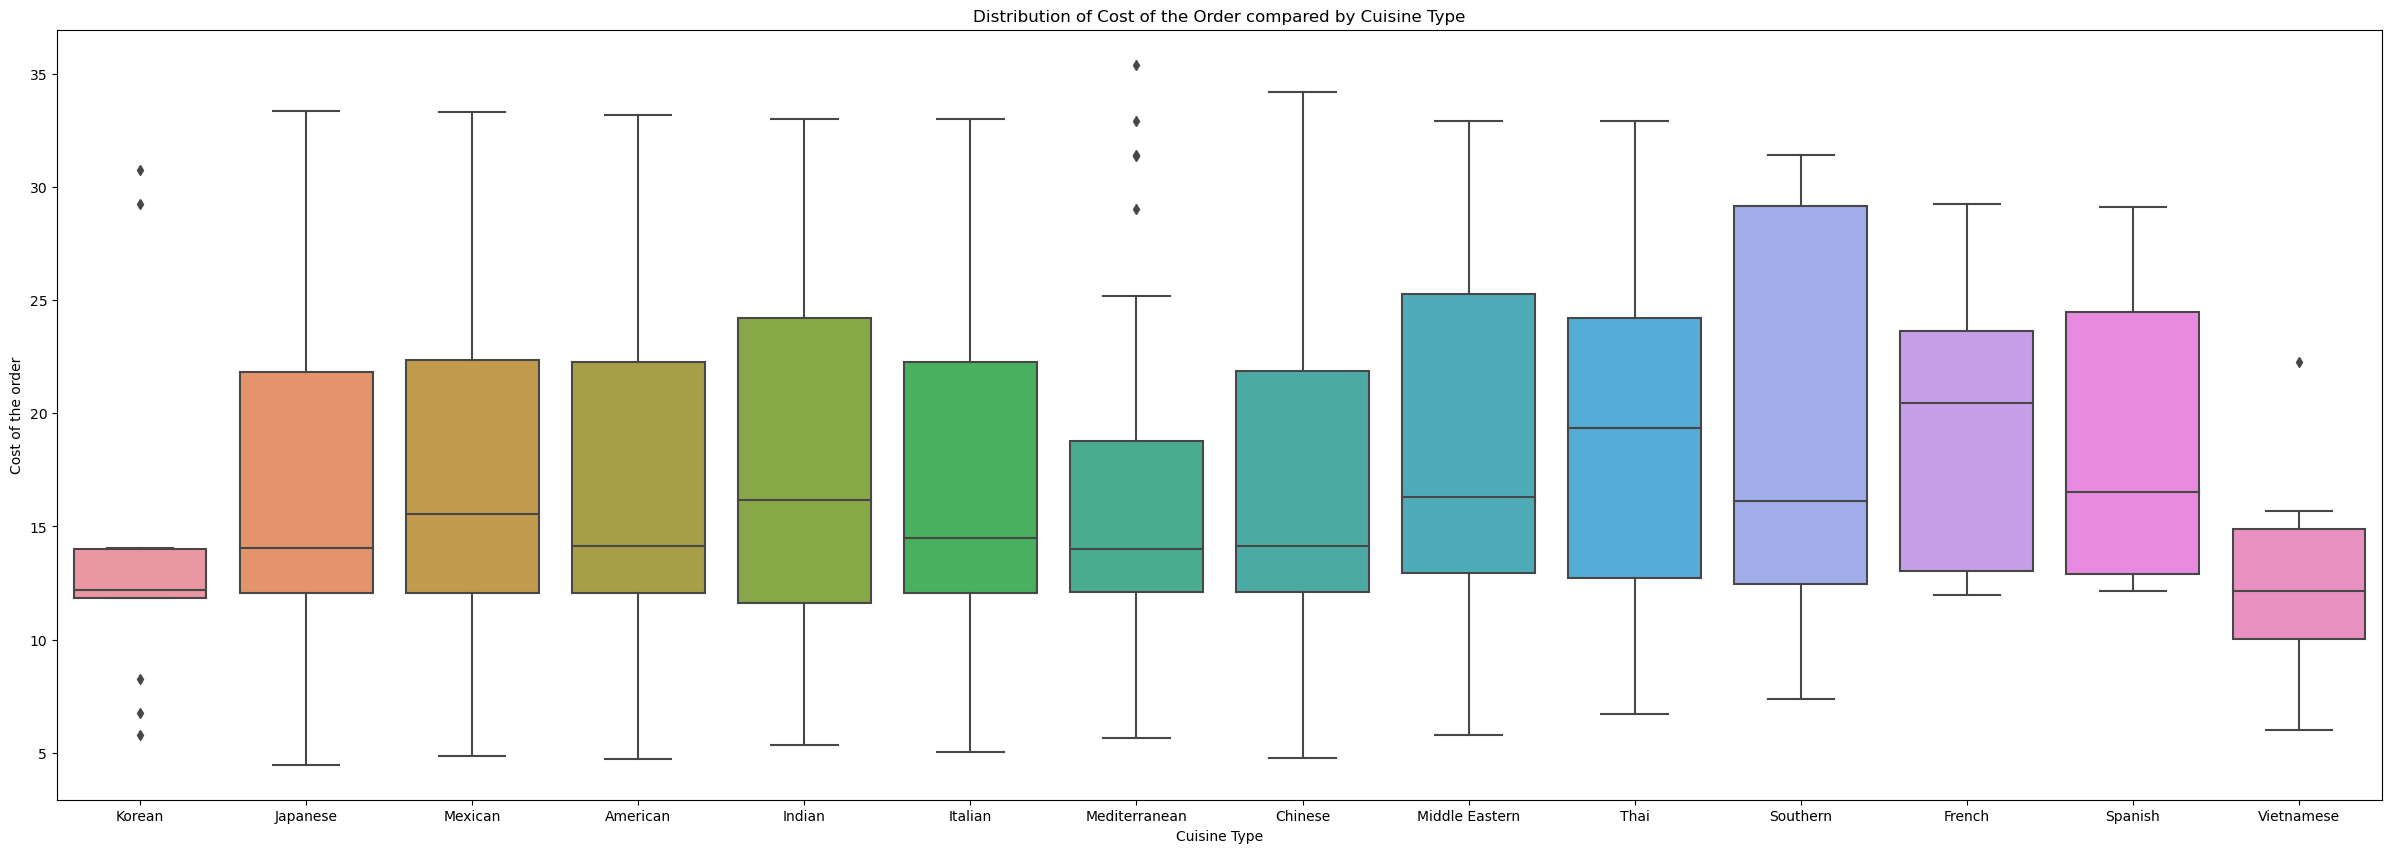

In [39]:
# adjusting the figure size
plt.figure(figsize=(30,10))
# boxplot of cost of the order and cuisine type
sns.boxplot(y=df['cost_of_the_order'], x=df['cuisine_type'])
# adding the style and outline of the outliers
plt.annotate('Outliers', xy = (0.97,45),xytext=(0.7, 44), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))
#adding title and labels
plt.title('Distribution of Cost of the Order compared by Cuisine Type')
plt.ylabel('Cost of the order')
plt.xlabel('Cuisine Type')
plt.show()

Although Mediterranean Cuisine had the order with the highest costs, it is not a general feature of this cuisine type as there are four orders that outperform the rest. The average costs of the order are highest for French and  Thai cuisine. For the Southern cuisine the third quartile is much wider than that of other cuisines and reaches higher order costs than other cuisines. There seems to be a segment within the cuisine where customers are willing to place more expensive orders. The variation in order costs is particularly huge for Chinese food and extremely small for Korean and Vietnamese. Where the latter two cuisines also have the lowerst average costs of the order. However, Korean cuisine has two orders who generate much higer costs of the order compared to the Korean average. What is interesting is, keeping in mind that American, Japanese and Italian were the most often ordered, that the distribution of costs of the order of those three are very similar and that the variation is hiergher for cuisines that are less often ordered.

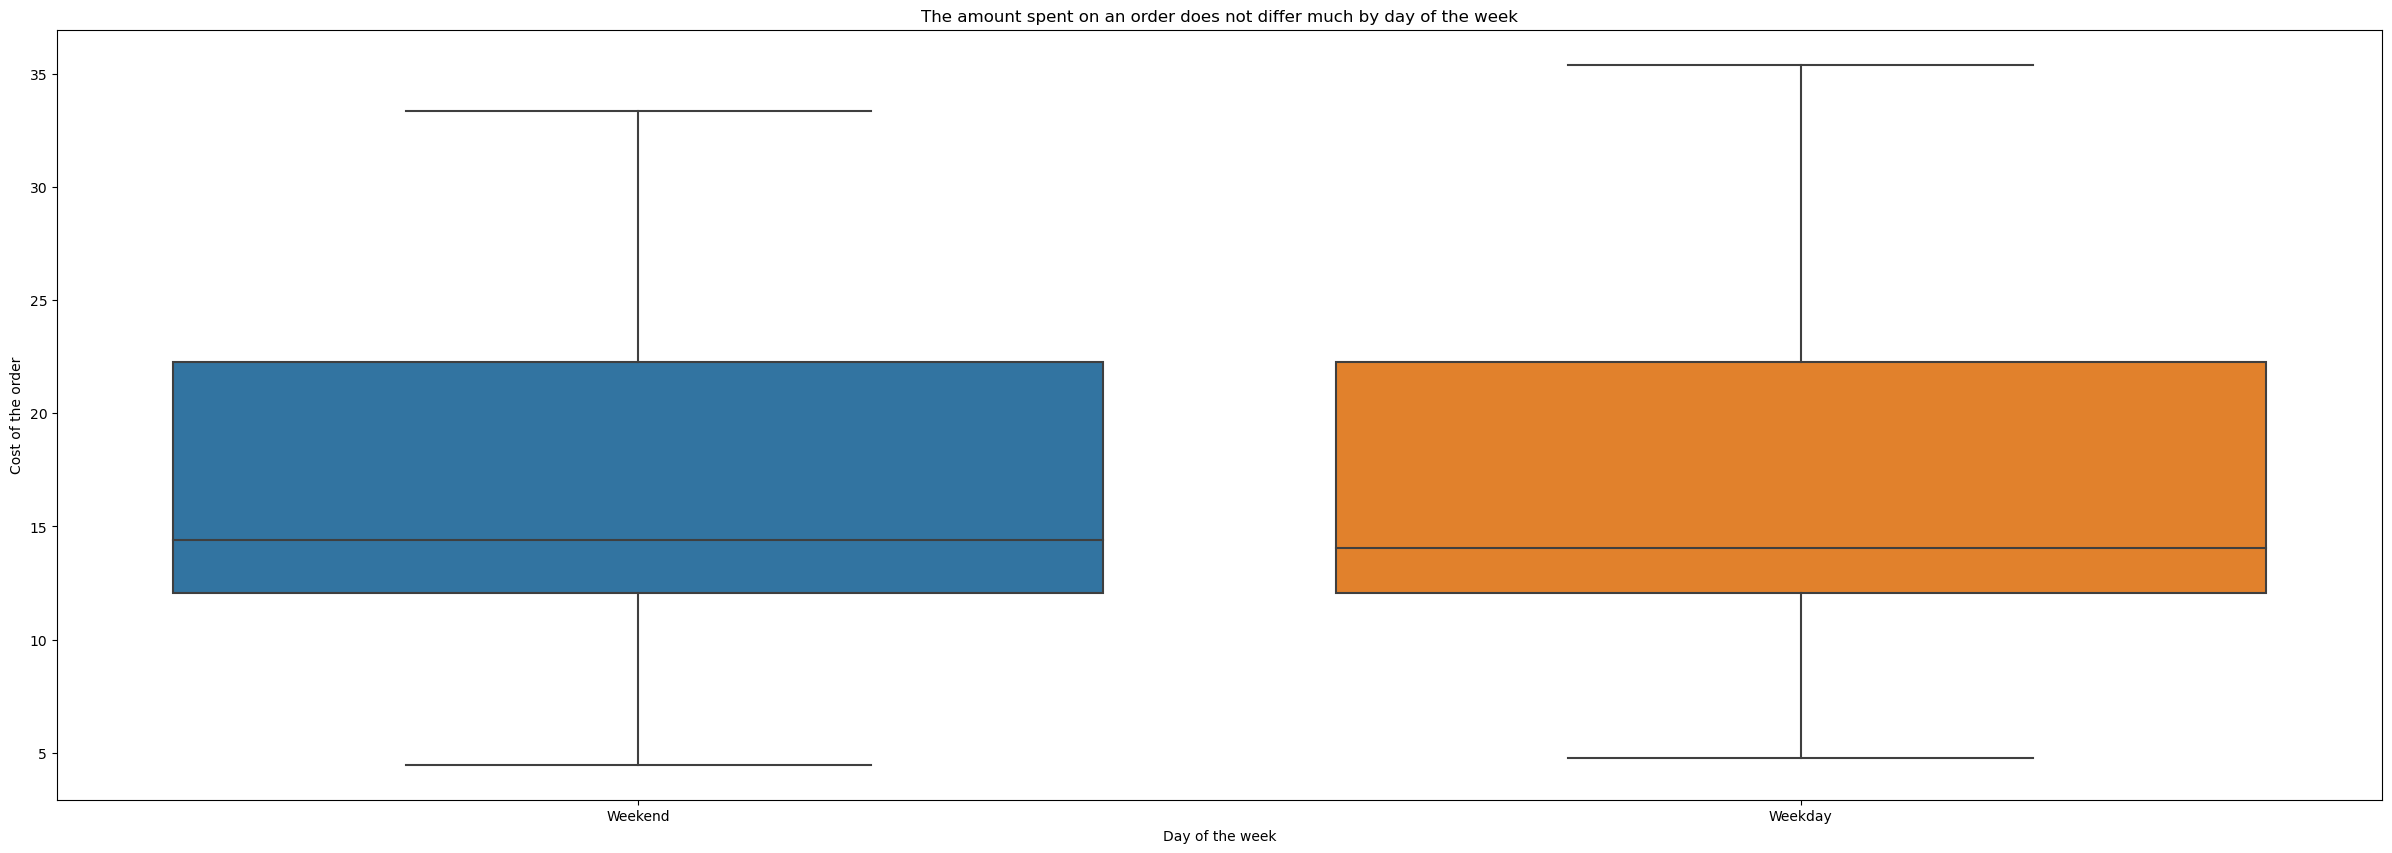

In [40]:
# adjusting figuer size
plt.figure(figsize=(30,10))
# boxplot of cost of the order and day of the week
sns.boxplot(y=df['cost_of_the_order'], x=df['day_of_the_week'])
# adding style of the outliers just in case (but there are no outliers in this graph)
plt.annotate('Outliers', xy = (0.97,45),xytext=(0.7, 44), arrowprops = dict(facecolor='black', arrowstyle = 'simple'))
# Adding title and labels
plt.title('The amount spent on an order does not differ much by day of the week')
plt.ylabel('Cost of the order')
plt.xlabel('Day of the week')
plt.show()

Costs of the order do not differ much between a weekday and the weekend, however the range of order costs is slightly wider on weekdays.

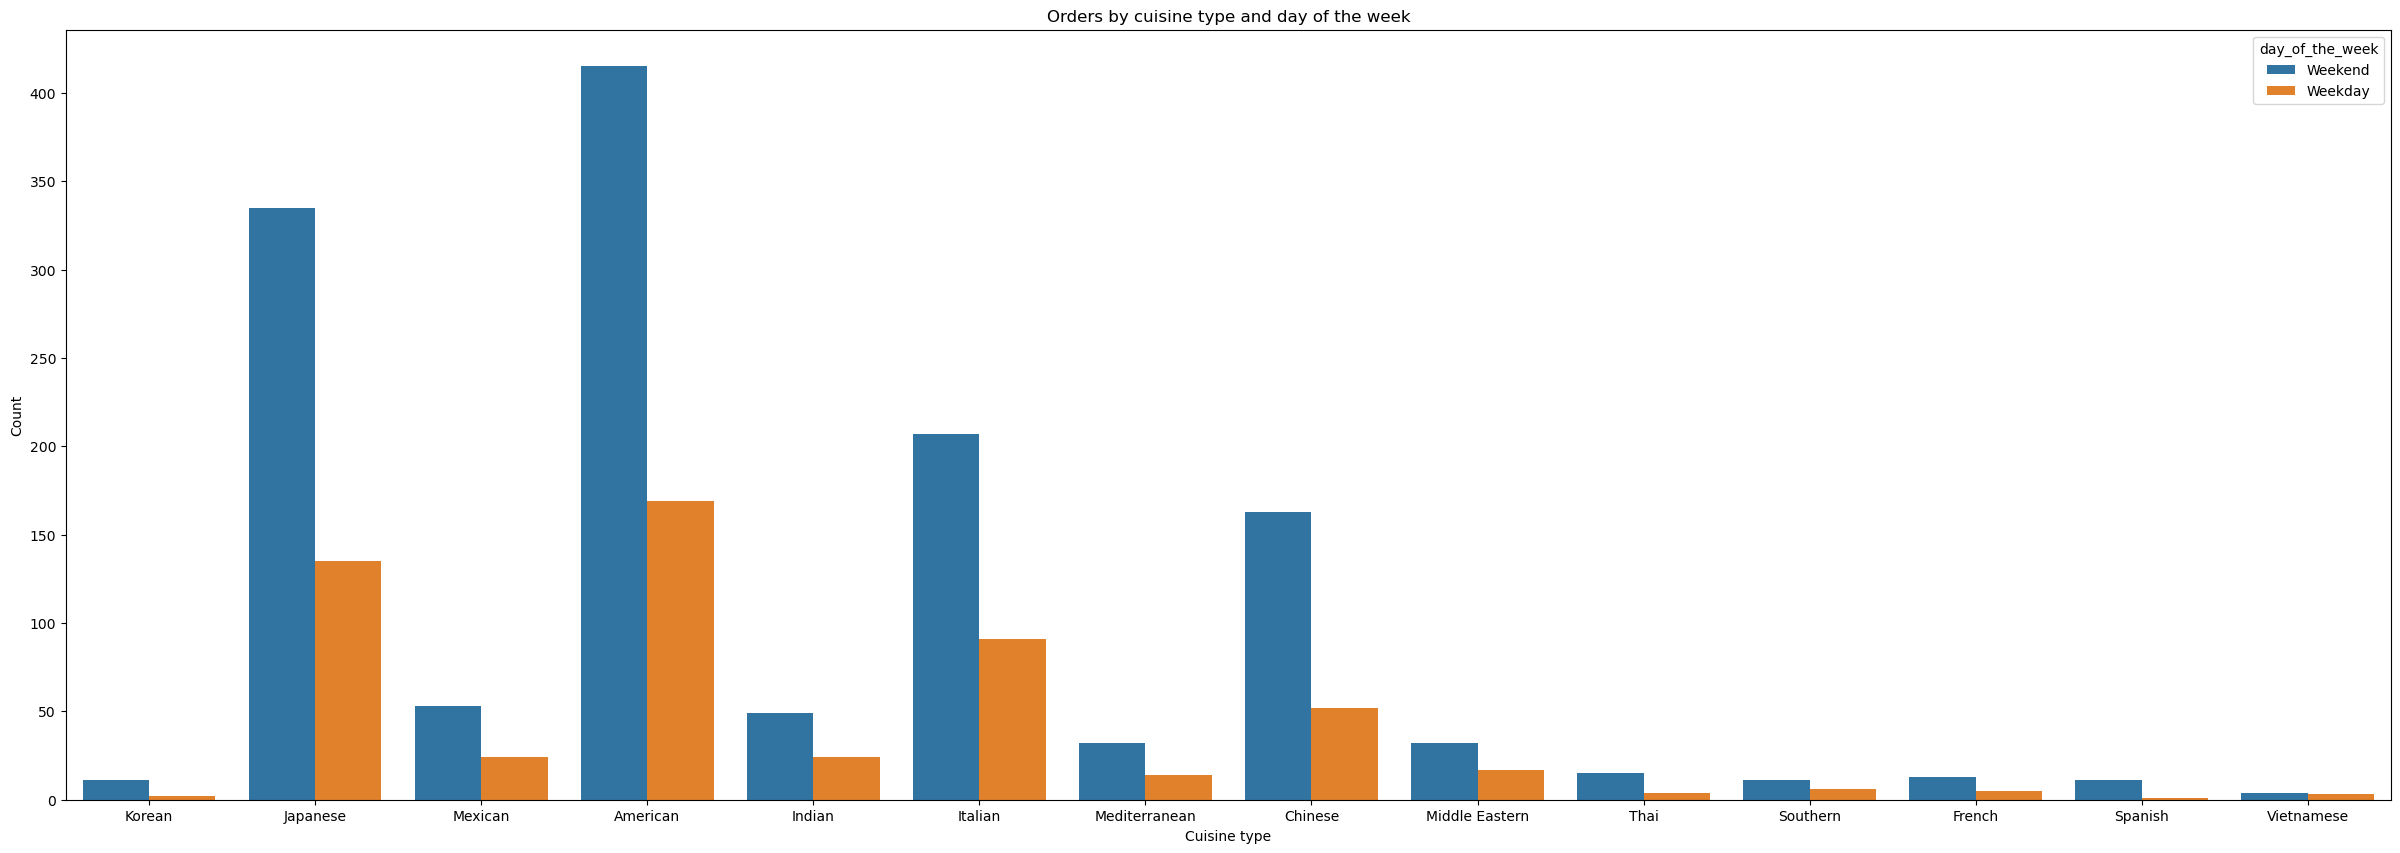

In [41]:
# adjusting figure size
plt.figure(figsize=(30,10))
# countplot of cuisine type and day of the week
sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week')
# adding title and labels
plt.title('Orders by cuisine type and day of the week')
plt.xlabel('Cuisine type')
plt.ylabel('Count')
plt.show()

Most orders are placed during the weekend and both during weekdays and the weekend, American cuisine is the most popular, followed by Japanese, Italian and Chinese.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [42]:
#removing  observations without rating
df1=df[df['rating']!='Not given']
#transforming column to integer
df1['rating']=df1['rating'].astype(int)
# calculating rating count and average rating
df2=df1.groupby("restaurant_name").agg({'rating': ['count', 'mean']})
#dropping multi-index level
df2=df2.droplevel(0, axis=1) 
# selecting average rating >4 
df2=df2[df2['mean']>4]
#selecting rating count>50
df2[df2['count']>50]

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:


The restaurants fulfilling the criteria are: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [44]:
# selecting orders having costs>20
df2=df[df['cost_of_the_order']>20]
# calculating revenue for orders having costs >20
a=df2['cost_of_the_order'].sum()*0.25
# selecting  orders having costs>5
df1=df[(df['cost_of_the_order']<20) & (df['cost_of_the_order']>5)]
# calculating revenue for orders having costs >25
b=df1['cost_of_the_order'].sum()*0.15
# adding up the revenue
np.round((a+b),2)

6166.3

#### Observations:


The net revenue generated by the company across all orders is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [45]:
#calculating total required time
df['total_required_time']=df['delivery_time']+df['food_preparation_time']
# calculating percentage for total required time > 60
np.round((df['total_required_time'][df['total_required_time']>60].count()/df['total_required_time'].count()),2)

0.11

#### Observations:


11% of orderst ake more than 60 minutes to be prepared and then delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [46]:
#grouping data by day of the week and calculating 
df.groupby("day_of_the_week").agg({'delivery_time': ['mean']})

,delivery_time
,mean
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [47]:
print('Difference in delivery time is: %1.2f' % (28.305882-22.436740))

Difference in delivery time is: 5.87


#### Observations:


The mean delivery time is approximately 28 minutes during the week and approximately 22 during the weekend.  Thus on average, deliver time is almost 6 minutes longer during the week. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:
*  Customer ratings are overall very positief.
*  American, Japanese and Italian cuisine are among the most ordered cuisines.
*  The bulk of orders is generated by a rather small group of restaurants. This is quite risky, if one of those top restaurants decides to switch to a different app or closes orders might decrease even by more than 200. 
*  Delivery time during weekdays is longer than during weekends and most orders are placed during the weekend.

### Recommendations:

* If possible, try to decrease delivery times during weekdays or maybe advertise restaurants that are quicker in delivery during the week more during the week.
* Make ordering during the week more attractive. Maybe by focusing on the prefered cuisine American as customers seem to be most likely to order American food. Another option could be give a special discount on a different cuisine during the week as to get customers to order next to American cuisine in the weekend, something different during the week.
* Try to get customers to try out new restaurants as to diversify the spread of orders across restaurants.

---